In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import seaborn as sns

In [2]:
start = pd.to_datetime('2010-01-01')
end =  pd.to_datetime('today')
stock='GOOG'

data=yf.download(stock,start,end)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14260\2605337420.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price        Date       Close        High         Low        Open     Volume
Ticker                   GOOG        GOOG        GOOG        GOOG       GOOG
0      2010-01-04   15.517998   15.586333   15.455851   15.522949   78541293
1      2010-01-05   15.449661   15.544985   15.389000   15.528643  120638494
2      2010-01-06   15.060195   15.495961   15.013152   15.495961  159744526
3      2010-01-07   14.709601   15.103277   14.673700   15.088422  257533695
4      2010-01-08   14.905697   14.936151   14.586052   14.657606  189680313
...           ...         ...         ...         ...         ...        ...
3926   2025-08-13  203.029999  205.429993  198.639999  204.979996   19573000
3927   2025-08-14  203.820007  205.419998  202.324997  202.559998   17777100
3928   2025-08-15  204.910004  207.330002  202.085007  204.720001   21111400
3929   2025-08-18  204.289993  206.139999  203.410004  205.070007   12982900
3930   2025-08-19  201.960007  204.289993  200.929993  203.910004    7903475

[3931 rows x 6 columns]

In [5]:
data.head()

Price        Date      Close       High        Low       Open     Volume
Ticker                  GOOG       GOOG       GOOG       GOOG       GOOG
0      2010-01-04  15.517998  15.586333  15.455851  15.522949   78541293
1      2010-01-05  15.449661  15.544985  15.389000  15.528643  120638494
2      2010-01-06  15.060195  15.495961  15.013152  15.495961  159744526
3      2010-01-07  14.709601  15.103277  14.673700  15.088422  257533695
4      2010-01-08  14.905697  14.936151  14.586052  14.657606  189680313

In [6]:
data.shape

(3931, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3931 non-null   datetime64[ns]
 1   (Close, GOOG)   3931 non-null   float64       
 2   (High, GOOG)    3931 non-null   float64       
 3   (Low, GOOG)     3931 non-null   float64       
 4   (Open, GOOG)    3931 non-null   float64       
 5   (Volume, GOOG)  3931 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 184.4 KB


In [8]:
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [9]:
data.describe()

Price                            Date        Close         High          Low  \
Ticker                                        GOOG         GOOG         GOOG   
count                            3931  3931.000000  3931.000000  3931.000000   
mean    2017-10-23 23:41:19.063851264    65.738184    66.408265    65.046488   
min               2010-01-04 00:00:00    10.796862    10.950618    10.736449   
25%               2013-11-26 12:00:00    25.331961    25.598517    25.086995   
50%               2017-10-23 00:00:00    49.118034    49.412284    48.742270   
75%               2021-09-18 12:00:00   103.964024   104.806772   102.384654   
max               2025-08-19 00:00:00   207.224548   208.212225   203.782599   
std                               NaN    51.625533    52.201246    51.045270   

Price          Open        Volume  
Ticker         GOOG          GOOG  
count   3931.000000  3.931000e+03  
mean      65.707017  5.196797e+07  
min       10.852323  1.584340e+05  
25%       25.356003  2.358200e+07  
50%       49.179668  3.290600e+07  
75%      103.192109  6.816856e+07  
max      205.070007  5.952147e+08  
std       51.596191  4.818250e+07

In [10]:
data.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [11]:
data.to_csv("powergrid.csv")
data_csv=pd.read_csv("powergrid.csv")

In [12]:
data_csv.head()

Price        Date               Close                High  \
0  Ticker         NaN                GOOG                GOOG   
1       0  2010-01-04  15.517997741699219  15.586333343118786   
2       1  2010-01-05  15.449661254882812  15.544984677945305   
3       2  2010-01-06  15.060194969177246  15.495961098006545   
4       3  2010-01-07  14.709601402282715  15.103277463132494   

                  Low                Open     Volume  
0                GOOG                GOOG       GOOG  
1   15.45585093907638   15.52294934956002   78541293  
2  15.389000032898519  15.528643330098225  120638494  
3  15.013152325690596  15.495961098006545  159744526  
4  14.673700111386996  15.088421691172952  257533695

In [13]:
# --- Get fundamentals ---
ticker = yf.Ticker(stock)
ticker_info = ticker.info   # fundamentals


# --- Build fundamentals dict (raw values only) ---
fundamentals = {
    "Market Cap": ticker_info.get("marketCap", "N/A"),
    "PE Ratio (TTM)": ticker_info.get("trailingPE", "N/A"),
    "PB Ratio": ticker_info.get("priceToBook", "N/A"),
    "Sharpe Ratio": f"{sharpe_ratio:.2f}" if 'sharpe_ratio' in locals() else "N/A",
    "Dividend Yield": ticker_info.get("dividendYield", "N/A"),
    "52-Week High": ticker_info.get("fiftyTwoWeekHigh", "N/A"),
    "52-Week Low": ticker_info.get("fiftyTwoWeekLow", "N/A"),
    "Beta": ticker_info.get("beta", "N/A"),
    "EPS (TTM)": ticker_info.get("trailingEps", "N/A"),
    "Revenue (TTM)": ticker_info.get("totalRevenue", "N/A"),
    "Profit Margins": ticker_info.get("profitMargins", "N/A")
}

# Convert to DataFrame
fundamentals_df = pd.DataFrame(fundamentals.items(), columns=["Metric", "Value"])

print(fundamentals_df)


            Metric          Value
0       Market Cap  2437293801472
1   PE Ratio (TTM)      21.530918
2         PB Ratio       6.735817
3     Sharpe Ratio            N/A
4   Dividend Yield           0.41
5     52-Week High          208.7
6      52-Week Low         142.66
7             Beta          1.014
8        EPS (TTM)           9.38
9    Revenue (TTM)   371399000064
10  Profit Margins        0.31118


In [14]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data_csv['Date'], open = data_csv['Open'], 
                                    high = data_csv['High'],
                                    low = data_csv['Low'], 
                                    close = data_csv['Close'])])
fig.update_layout(width=900,height=500,xaxis_title="Time",yaxis_title="Price",xaxis_rangeslider_visible=False)
fig.show()

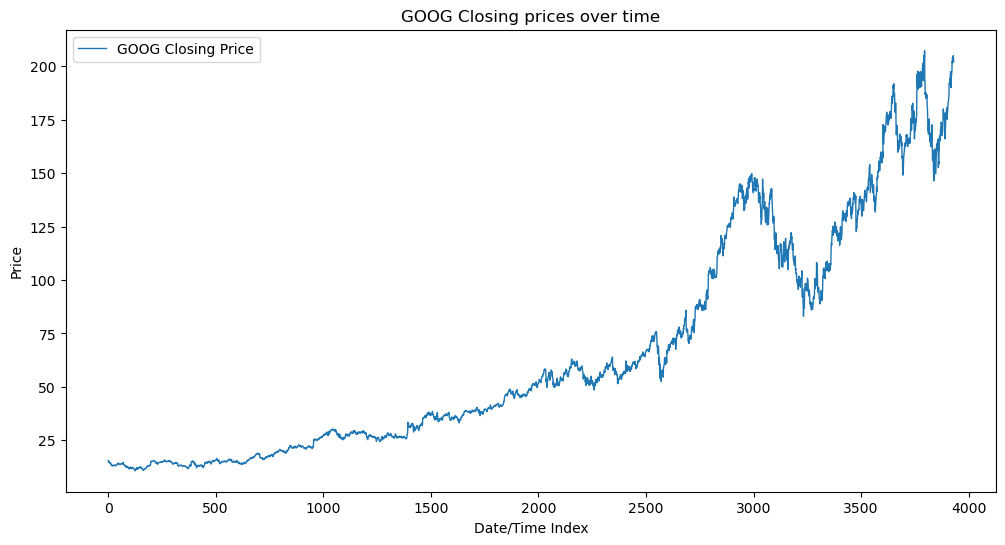

In [15]:
#--------------------Closing prices over time----------------------
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.xlabel('Date/Time Index')
plt.ylabel('Price')
plt.legend()
plt.show()

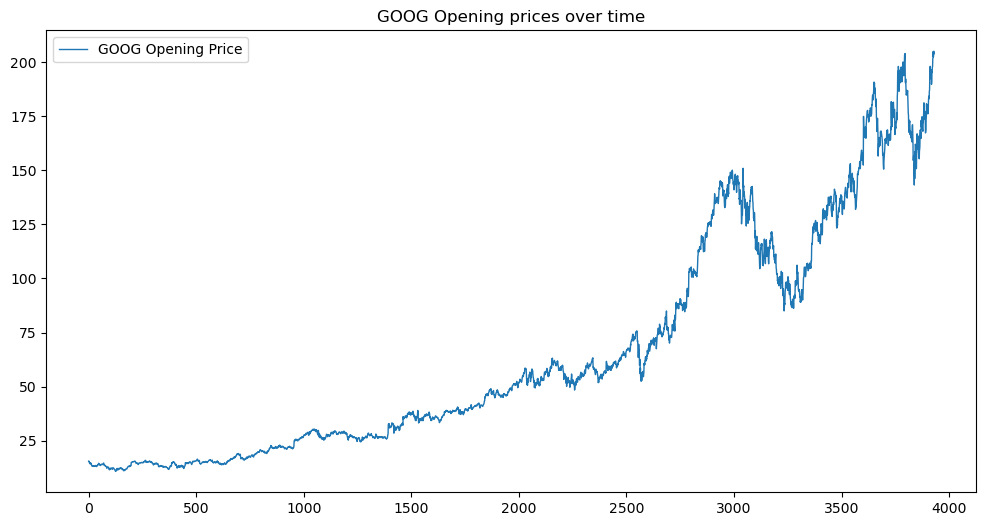

In [16]:
#--------------------Opening prices over time----------------------
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

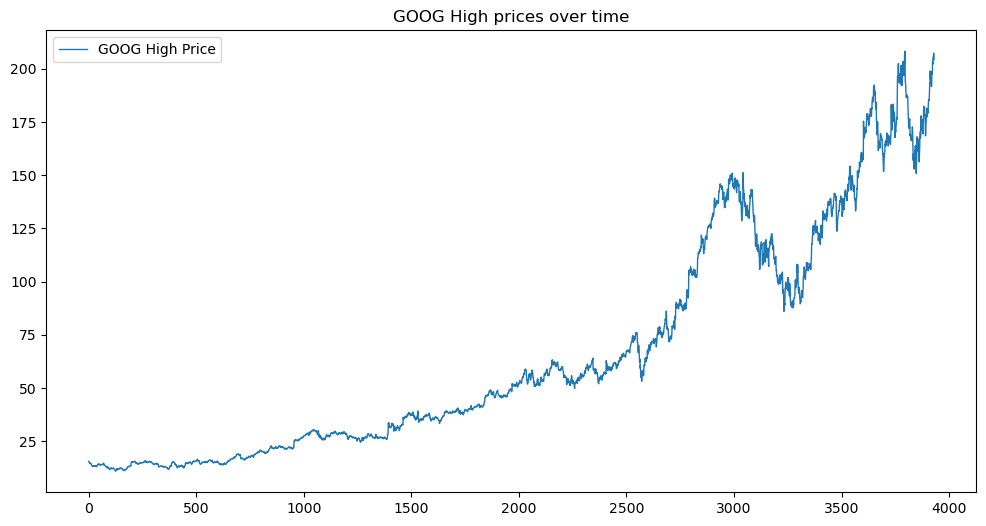

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

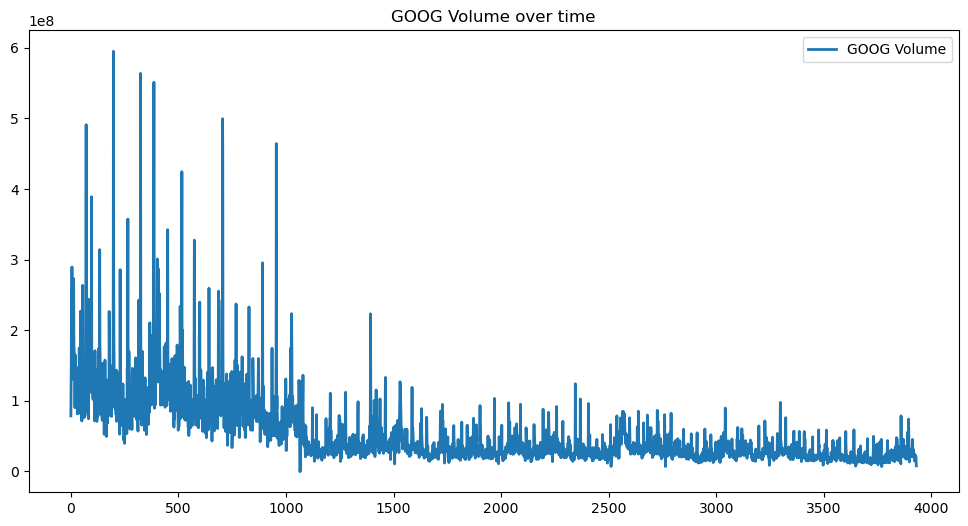

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show() 

In [19]:
ma_100=data.Close.rolling(100).mean()

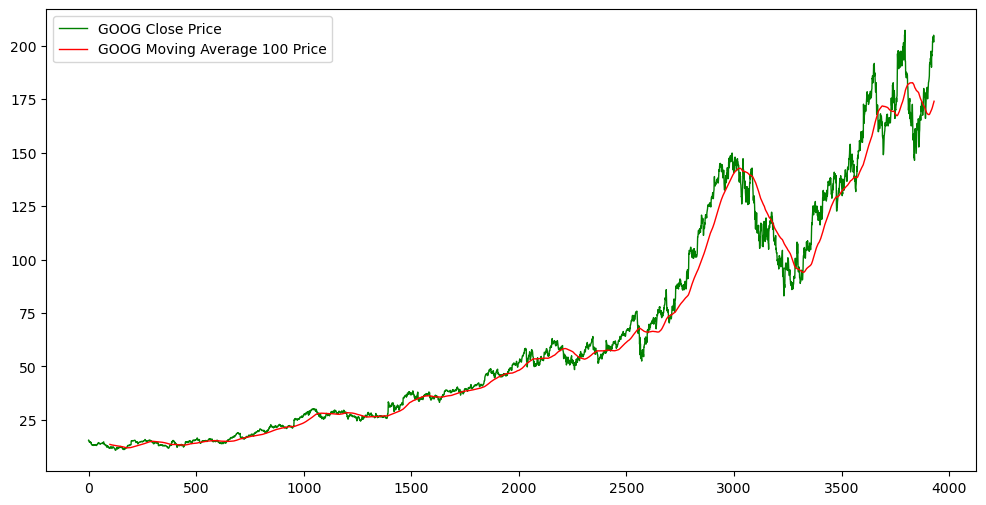

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close,'g', label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma_100, 'r',label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.legend()
plt.show()

In [21]:
ma_200=data.Close.rolling(200).mean()

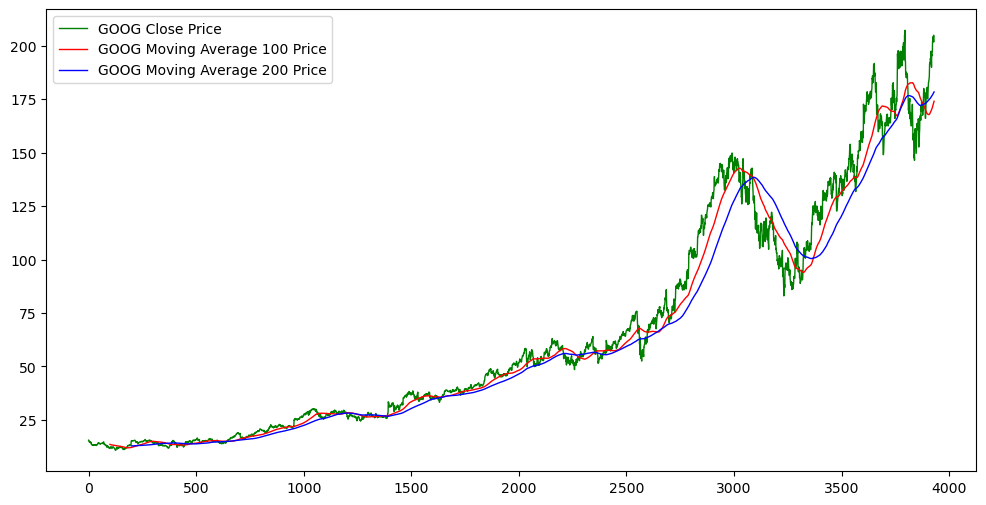

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close,'g', label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma_100, 'r',label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma_200, 'b',label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

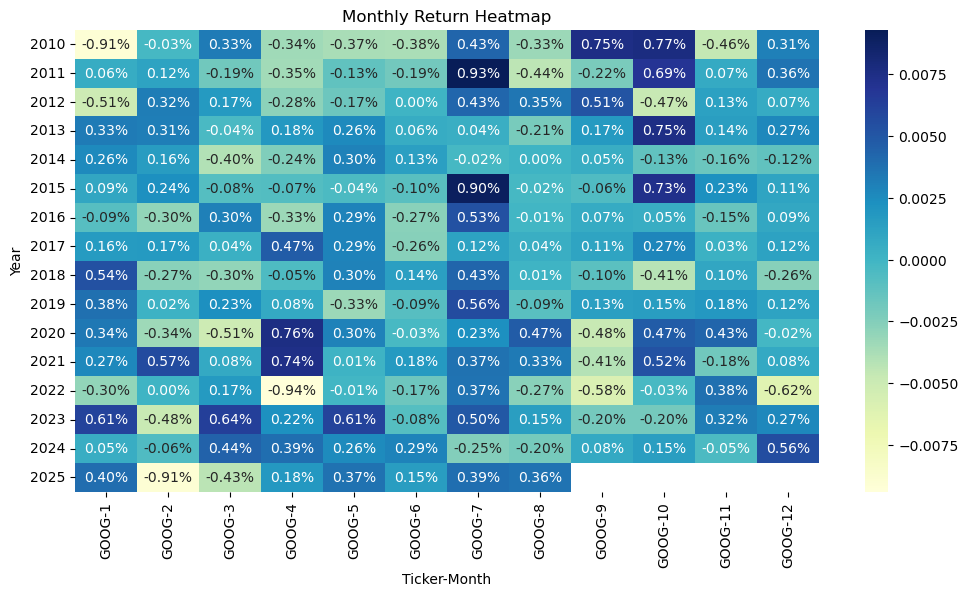

In [23]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
monthly_return = data['Close'].pct_change().groupby([data['Year'], data['Month']]).mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_return, cmap='YlGnBu', annot=True, fmt='.2%', cbar=True)
plt.title('Monthly Return Heatmap')
plt.show()

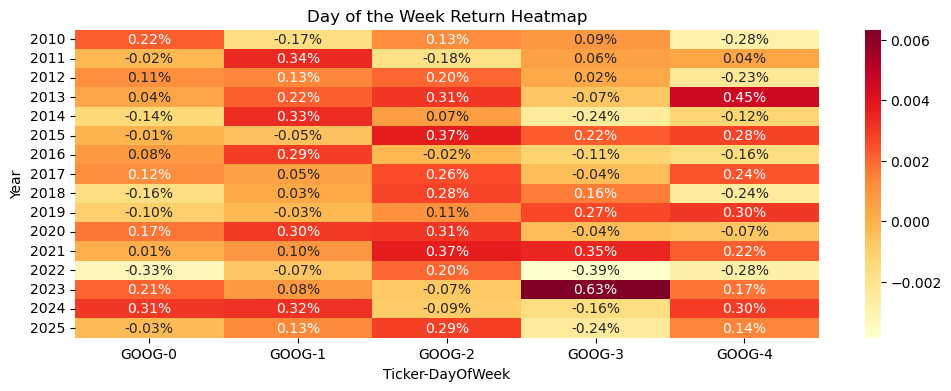

In [24]:
data['DayOfWeek'] = data['Date'].dt.dayofweek
weekly_return = data['Close'].pct_change().groupby([data['Year'], data['DayOfWeek']]).mean().unstack()
plt.figure(figsize=(12, 4))
sns.heatmap(weekly_return, cmap='YlOrRd', annot=True, fmt='.2%', cbar=True)
plt.title('Day of the Week Return Heatmap')
plt.show()

In [25]:
# Training & Testing

data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.80)])
data_test = pd.DataFrame(data['Close'][int(len(data)*0.80): int(len(data))])

In [26]:
data_train.shape

(3144, 1)

In [27]:
data_test.shape

(787, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [29]:
data_train_sc=sc.fit_transform(data_train)

In [30]:
x_train = []
y_train = []

for i in range(100, data_train_sc.shape[0]):
    x_train.append(data_train_sc[i-100:i])
    y_train.append(data_train_sc[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [31]:
x_train.shape

(3044, 100, 1)

In [32]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - loss: 0.0164
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 270ms/step - loss: 0.0040
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 271ms/step - loss: 0.0043
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - loss: 0.0033
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 270ms/step - loss: 0.0033
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 262ms/step - loss: 0.0032
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 260ms/step - loss: 0.0028
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - loss: 0.0027
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - loss: 0.0027
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - loss: 0.0027
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - loss: 0.0025
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step - loss: 0.0026
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 271ms/step - loss: 0.0025
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - loss: 0.0026
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [36]:
past_100_days = data_train.tail(100)

In [37]:
final_df = pd.concat([past_100_days,data_test], ignore_index = True)

In [38]:
input_data = sc.fit_transform(final_df)

In [55]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


x_test, y_test  = np.array(x_test), np.array(y_test)
y_test1=y_test

In [56]:
x_test.shape

(787, 100, 1)

In [57]:
y_test.shape

(787,)

In [58]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [59]:
x_test.shape

(787, 100, 1)

In [60]:
y_predicted = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step 


In [61]:
y_predicted.shape

(787, 1)

In [62]:
# a=1/sc.scale_
# a

In [63]:
# scaler_factor = a
# y_predicted = y_predicted * scaler_factor
# y_test = y_test * scaler_factor

In [64]:
y_predicted = sc.inverse_transform(y_predicted)

In [65]:
y_predicted

array([[112.37523 ],
       [112.391846],
       [112.41704 ],
       [112.44529 ],
       [112.47859 ],
       [112.53237 ],
       [112.62561 ],
       [112.76547 ],
       [112.94438 ],
       [113.14142 ],
       [113.337   ],
       [113.513725],
       [113.65075 ],
       [113.74429 ],
       [113.8024  ],
       [113.837364],
       [113.841095],
       [113.80246 ],
       [113.69848 ],
       [113.54158 ],
       [113.371056],
       [113.21605 ],
       [113.09398 ],
       [113.01609 ],
       [112.99521 ],
       [113.04411 ],
       [113.16387 ],
       [113.35286 ],
       [113.60818 ],
       [113.94844 ],
       [114.38996 ],
       [114.940506],
       [115.61159 ],
       [116.36672 ],
       [117.158585],
       [117.93523 ],
       [118.64307 ],
       [119.23395 ],
       [119.689255],
       [119.98102 ],
       [120.11117 ],
       [120.09055 ],
       [119.931854],
       [119.62792 ],
       [119.175354],
       [118.59235 ],
       [117.90618 ],
       [117.1

In [66]:
y_test=np.reshape(y_test,(y_test.shape[0],1))
y_test.shape

(787, 1)

In [67]:
y_test=sc.inverse_transform(y_test)

In [68]:
y_test

array([[108.72621918],
       [108.43643951],
       [113.21404266],
       [114.53269958],
       [118.60101318],
       [119.4584198 ],
       [115.83396912],
       [114.17085266],
       [111.52409363],
       [110.78150177],
       [112.10066223],
       [109.26054382],
       [113.94271088],
       [114.02223206],
       [114.36022949],
       [107.71970367],
       [107.57057953],
       [104.81694794],
       [112.9287262 ],
       [113.91288757],
       [115.95075989],
       [114.79762268],
       [115.2151413 ],
       [118.07813263],
       [118.16759491],
       [117.5214386 ],
       [117.44190979],
       [116.80567932],
       [119.93708038],
       [119.11199188],
       [121.92525482],
       [122.15389252],
       [121.78608704],
       [119.60902405],
       [120.14584351],
       [117.42201996],
       [114.39004517],
       [114.09182739],
       [114.02223206],
       [117.00450134],
       [110.64233398],
       [109.68799591],
       [109.26054382],
       [108

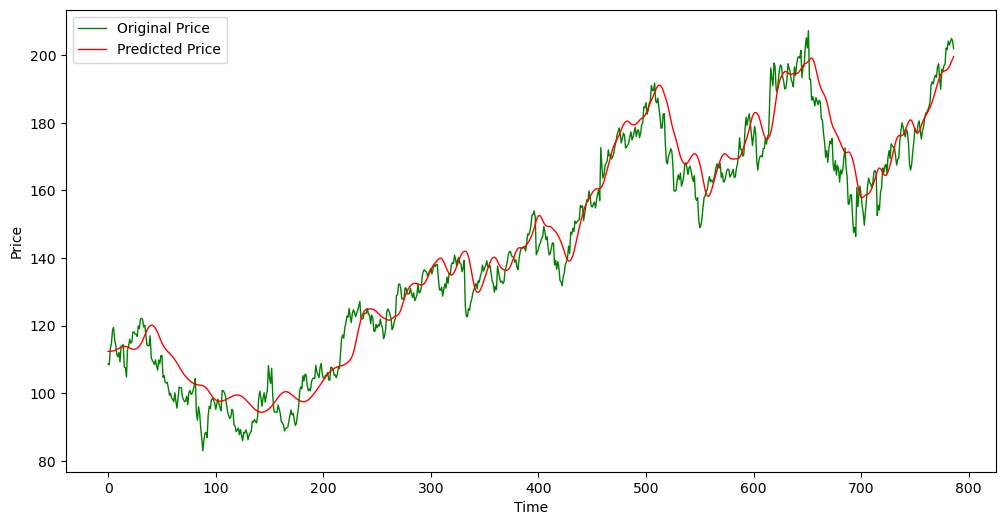

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(y_test,'g', label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, 'r',label = 'Predicted Price', linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
#Future Stock Price
m = y_test1
z= []
future_days = 30
for i in range(future_days):
    m = m.reshape(-1,1)
    inter = [m[-100:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/ste

In [71]:
z = np.array(z)
z = sc.inverse_transform(z.reshape(-1,1))

In [72]:
z

array([[200.1313508 ],
       [200.51264858],
       [200.68160581],
       [200.66579708],
       [200.51176744],
       [200.26919408],
       [199.98185275],
       [199.68331573],
       [199.39667043],
       [199.13559308],
       [198.90655525],
       [198.71084534],
       [198.54661222],
       [198.41018322],
       [198.29724147],
       [198.20347014],
       [198.12486333],
       [198.05794093],
       [197.99992621],
       [197.94851635],
       [197.90200091],
       [197.85912111],
       [197.81891435],
       [197.78078827],
       [197.74429861],
       [197.70925283],
       [197.67553246],
       [197.6431153 ],
       [197.61197913],
       [197.58216838]])

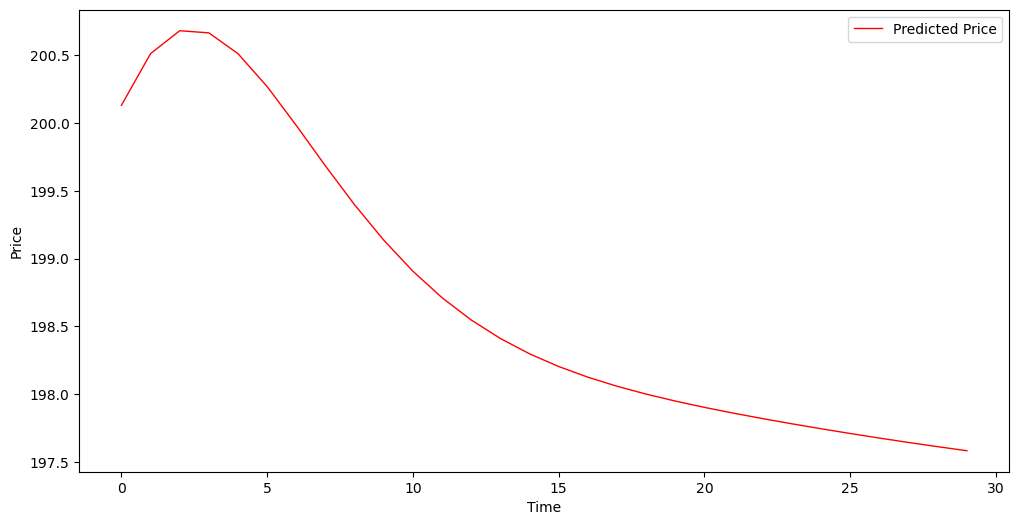

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(z, 'r',label = 'Predicted Price', linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [75]:
model.save('Stock Price Prediction.keras')